---
title: UNDERSTANDING OVERFITTING USING POLYNOMIAL REGRESSION
date: 2019-09-01

# Put any other Academic metadata here...
---

We know that even though linear models can provide good training models rudimentarily, there are lots of situations where the variables don't reveal a linear relationship. Thus we need to create polynomial models for such datasets.One major issue with polynomial models is that they are suspectible to overfitting.In this article we will look at how a higher degree polynomial model overfits a dataset to create a perfect training environment as opposed to it's errors introduced while testing on the same degree.We will further look at how regularization helps to tackel overfitting and what values of hyperparameters produce the best results.

<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;>Importing the necessary libraries</p>


In [12]:
import math
import pandas as pd
import operator
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;>
Creating X,Y data pairs.Here x is sampled from a uniform distribution and N from a gaussian normal distribution</p>

In [13]:
#we can change the seed value to get different randome numbers for our x,N values
np.random.seed(45)
x=np.random.uniform(low=0,high=1,size=20)
mu=0
sigma=1
#N is based on a gaussian normal distribution
N=np.random.normal(mu,sigma,size=20)
y=(np.sin(2*np.pi*x))+N

In [14]:
#splitting the dataset into 10 for training and 10 for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
x_train

array([0.97600332, 0.62739168, 0.44053089, 0.99072168, 0.16332445,
       0.07728957, 0.28266721, 0.673068  , 0.47280797, 0.048522  ])

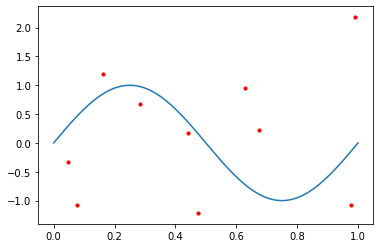

In [15]:
#a reference true fit graph to see how our data fits with different polynomial degrees
x_rn=np.linspace(0,1,100)
y_rn=(np.sin(2*np.pi*x_rn))
plt.scatter(x_train,y_train,s=10,color="red")
plt.plot(x_rn,y_rn)
plt.show()

<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;> 
 Making the graphs for fit data with the specific degrees ranging from 0 to 9 </p>
 
 <p style=font-weight:bold;> We can observe that as we increase the degree of our polynomial regression model , the graph tends to cover all the datapoints leading to overfitting </p>

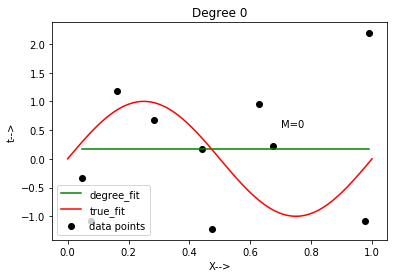

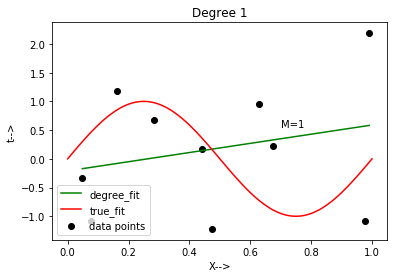

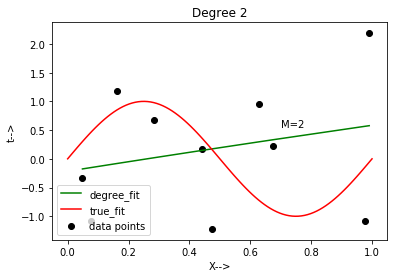

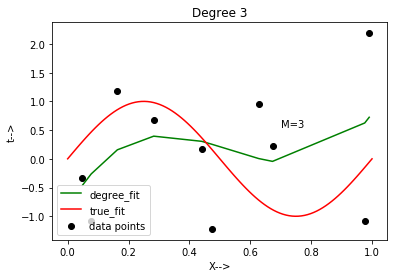

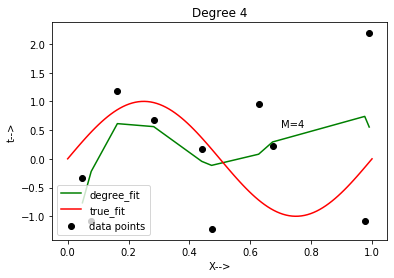

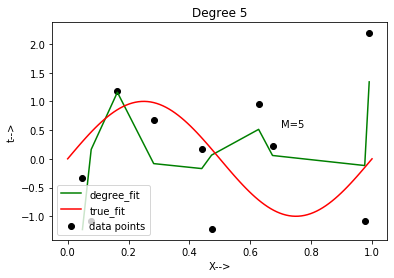

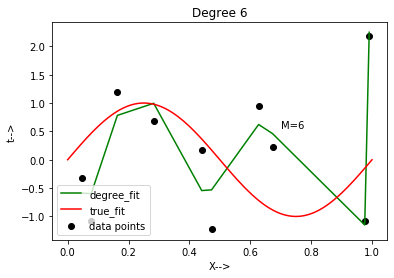

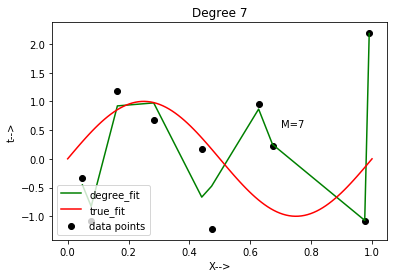

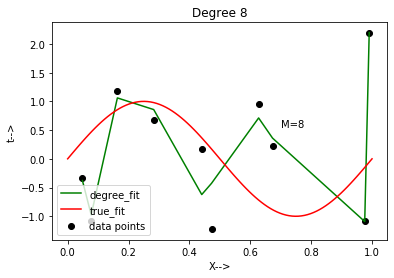

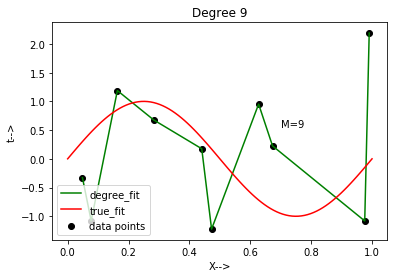

In [16]:
from sklearn.pipeline import make_pipeline
#x = np.sort(x_train[:])
#y=np.sort(y_train[:])
train_error=[]
test_error=[] 
for i in range(10):
    plt.title('Degree %d' %i)
    plt.text(0.7, .55, 'M=%d' %i)
    X = x_train[:, np.newaxis]
    Y = y_train[:, np.newaxis]
    X1 = x_test[:,np.newaxis]
    Y1 = y_test[:,np.newaxis]
    #we first make use of the linearregression model to observe how it overfits at higher degrees.
    model = make_pipeline(PolynomialFeatures(i), LinearRegression())

    model.fit(X,Y)
    y_pred = model.predict(X)
    mse = (mean_squared_error(Y,y_pred))
    rmse=math.sqrt(mse)
    train_error.append(rmse)
    
    y_test_pred=model.predict(X1)
    mse_test= (mean_squared_error(Y1,y_test_pred))
    rmse_test=math.sqrt(mse_test)
    test_error.append(rmse_test)
    #sorting
    lists=sorted(zip(*[X,y_pred]))
    X,y_pred = list(zip(*lists))
    #plotting the models at various degrees.
    plt.scatter(x_train, y_train,color='black',label='data points')
    plt.plot(X, y_pred, color='g',label='degree_fit')
    plt.plot(x_rn,y_rn,color='r',label='true_fit')
    plt.legend(loc="lower left")
    _=plt.xlabel("X-->")
    _=plt.ylabel("t-->")
    plt.show()
    

<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;> 
    Plotting training vs test error
    </p>
    

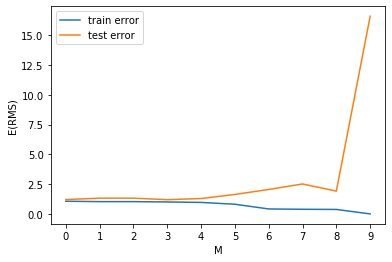

In [17]:
plt.plot(train_error,label='train error')
plt.plot(test_error,label='test error')
plt.xticks(np.arange(0, 10, 1.0))
plt.legend(loc="upper left")
_=plt.xlabel("M")
_=plt.ylabel("E(RMS)")
plt.show()

<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;> 
    Generating 100 data points and fitting ninth order model on it </p>

In [18]:
#creating 100 data points
np.random.seed(10)
x2=np.random.uniform(low=0,high=1,size=100)
mu=0
sigma=1
N2=np.random.normal(mu,sigma,size=100)
y2=(np.sin(2*np.pi*x2))+N2

In [19]:
x_train100, x_test100, y_train100, y_test100 = train_test_split(x2, y2, test_size=0.01)

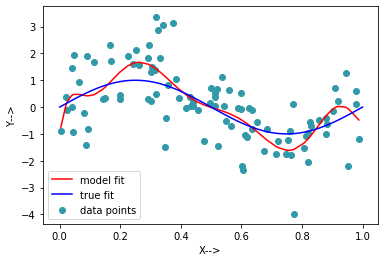

In [20]:
X100 = x_train100[:, np.newaxis]
Y100 = y_train100[:, np.newaxis]
model = make_pipeline(PolynomialFeatures(9), LinearRegression())

#fitting the 100 data points of the ninth order model.
model.fit(X100,Y100)
y_pred100 = model.predict(X100)

 #sorting
lists=sorted(zip(*[X100,y_pred100]))
X100,y_pred100 = list(zip(*lists))
    
plt.scatter(x_train100, y_train100,color='#3299a8',label='data points')
plt.plot(X100, y_pred100, color='r',label='model fit')
plt.plot(x_rn,y_rn,color='b',label='true fit')
plt.legend(loc="lower left")
_=plt.xlabel("X-->")
_=plt.ylabel("Y-->")
plt.show()

<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;> Regularisation and graph creation for different values of lambda</p>

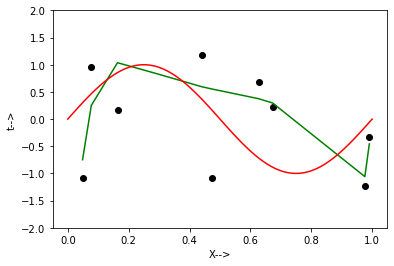

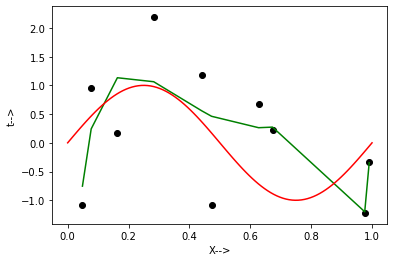

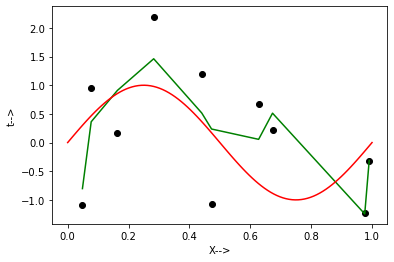

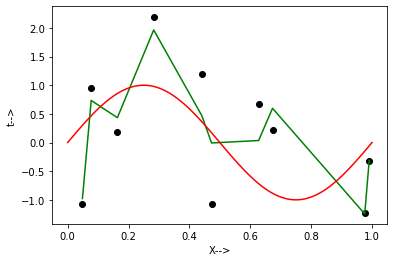

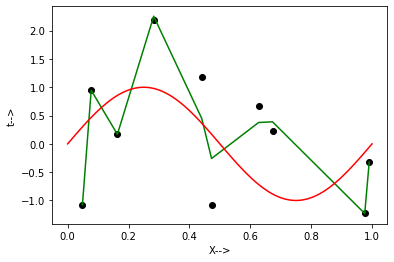

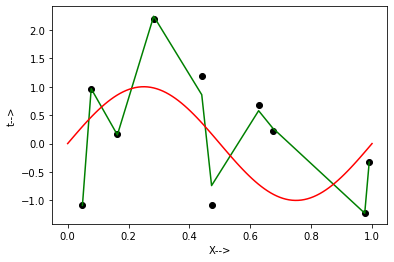

In [21]:
lbd=[1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
plt.ylim(-2,2)
train_error2=[]
test_error2=[]
for i in range(6):
    model1= make_pipeline(StandardScaler(),PolynomialFeatures(degree=9), Ridge(alpha=lbd[i],fit_intercept=True))
    
    model1.fit(X,Y)
    y_pred2 = model1.predict(X)
    mse2 = (mean_squared_error(Y,y_pred2))
    rmse2=math.sqrt(mse2)
    train_error2.append(rmse2)
    
    y_test_pred2=model1.predict(X1)
    mse_test2= (mean_squared_error(Y1,y_test_pred2))
    rmse_test2=math.sqrt(mse_test2)
    test_error2.append(rmse_test2)
    
    lists=sorted(zip(*[X,y_pred2]))
    X,y_pred2 = list(zip(*lists))
    
    plt.scatter(X,Y,color='black')
    plt.plot(X, y_pred2, color='g')
    plt.plot(x_rn,y_rn,color='r')
    _=plt.xlabel("X-->")
    _=plt.ylabel("t-->")
    plt.show()
    #print('Score: {}'.format(model1.score(X,Y)))
    #print('Test :{}' .format(model1.score(x_test.reshape(-1,1),y_test.reshape(-1,1))))
    

<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;> Plotting Training vs Test values for various lambda </p> 

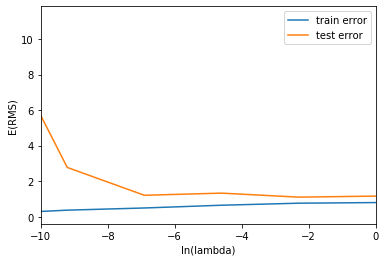

In [22]:
plt.plot(np.log(lbd),train_error2,label='train error')
plt.plot(np.log(lbd),test_error2,label='test error')
#plt.xscale("log")
#plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlim(-10,0)
plt.legend(loc="upper right")
_=plt.xlabel("ln(lambda)")
_=plt.ylabel("E(RMS)")
plt.show()
#print(test_error2)

<p style="font-family:Georgia;font-size:16px;background-color:#2455d1;color:white;"> Based on best test perfomance the Ridge model helps us to regularize our overfitting which we could not do throug LinearRegression. We observe that as the model complexity increases,bias decreases and variance increases and vice versa.Also,we can see that as the lambda value decreases we get a good training score and we obtain the best training score for lambda =1/100000.But thats not the case with the testing score.Before we regularise, we see that the model of degree 9 fits all the data points but leads to overfitting.So a polynoial regression model of degree 6 will be best amongst what we tried without leading to overfit.Also after we regularize we see that the lambda values are almost constant before increasing so the model with lambda 1/1000 seems to be the best </p>